# Lab Task 4

**Name**: Tazmeen Afroz  
**Roll No**: 22p-9252  
**Section**: BAI-5A  

---


#### Basic Insights

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing



df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


| Column Name  | Description                             | Data Type   | Range/Units  | Notes                                        |
|--------------|-----------------------------------------|-------------|--------------|----------------------------------------------|
| mpg          | Miles per gallon                        | Continuous  | 9.0 - 46.6   | Target variable; measure of fuel efficiency  |
| cylinders    | Number of cylinders in the engine       | Discrete    | 3 - 8        | Categorical, but represented as integers     |
| displacement | Engine displacement                     | Continuous  | 68 - 455     | Measured in cubic inches                    |
| horsepower   | Engine horsepower                       | Continuous  | 46 - 230     | Contains some missing values (denoted as '?')|
| weight       | Vehicle weight                          | Continuous  | 1613 - 5140  | Measured in pounds                          |
| acceleration | Time to accelerate from 0 to 60 mph     | Continuous  | 8.0 - 24.8   | Measured in seconds                         |
| model year   | Model year of the vehicle               | Discrete    | 70 - 82      | Represents model years 1970 to 1982         |
| origin       | Origin of the vehicle                   | Categorical | 1, 2, 3      | 1 = USA, 2 = Europe, 3 = Japan              |
| car name     | Name of the vehicle                     | String      | N/A          | Unique for each instance                    |

**Notes**:
1. The dataset contains **398 instances** (rows) and **9 attributes** (columns).
2. **'mpg'** is the target variable, typically used for prediction tasks in machine learning models.
3. **'horsepower'** is the only column with missing values, which may require handling in data preprocessing.
4. **'origin'** is encoded as numbers but represents categorical data and might need to be treated as such in analyses.
5. **'car name'** provides additional context but is typically not used as a feature in predictive modeling.
6. The dataset spans car models from **1970 to 1982**, capturing a significant period in automotive history.
7. There's a mix of continuous and categorical variables, which may require different preprocessing techniques.
8. Some variables (like **'weight'** and **'horsepower'**) may have strong correlations with the target variable **'mpg'**.



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [25]:
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398.0,NaN,NaN,NaN,23.514573,7.815984,9.0,17.5,23.0,29.0,46.6
cylinders,398.0,NaN,NaN,NaN,5.454774,1.701004,3.0,4.0,4.0,8.0,8.0
displacement,398.0,NaN,NaN,NaN,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0
horsepower,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,398.0,NaN,NaN,NaN,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0
acceleration,398.0,NaN,NaN,NaN,15.56809,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,NaN,NaN,NaN,76.01005,3.697627,70.0,73.0,76.0,79.0,82.0
origin,398.0,NaN,NaN,NaN,1.572864,0.802055,1.0,1.0,1.0,2.0,3.0
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:


numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
Categorical variables: ['horsepower', 'car name']


In [27]:

non_numeric = df['horsepower'][pd.to_numeric(df['horsepower'], errors='coerce').isna()]
print(non_numeric.unique())  



['?']


In [28]:
# Replace '?' with NaN
df['horsepower'] = df['horsepower'].replace('?', np.nan)

df['horsepower'] = pd.to_numeric(df['horsepower'])

In [29]:


categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 1
Number of numerical variables: 8


#### Visualization

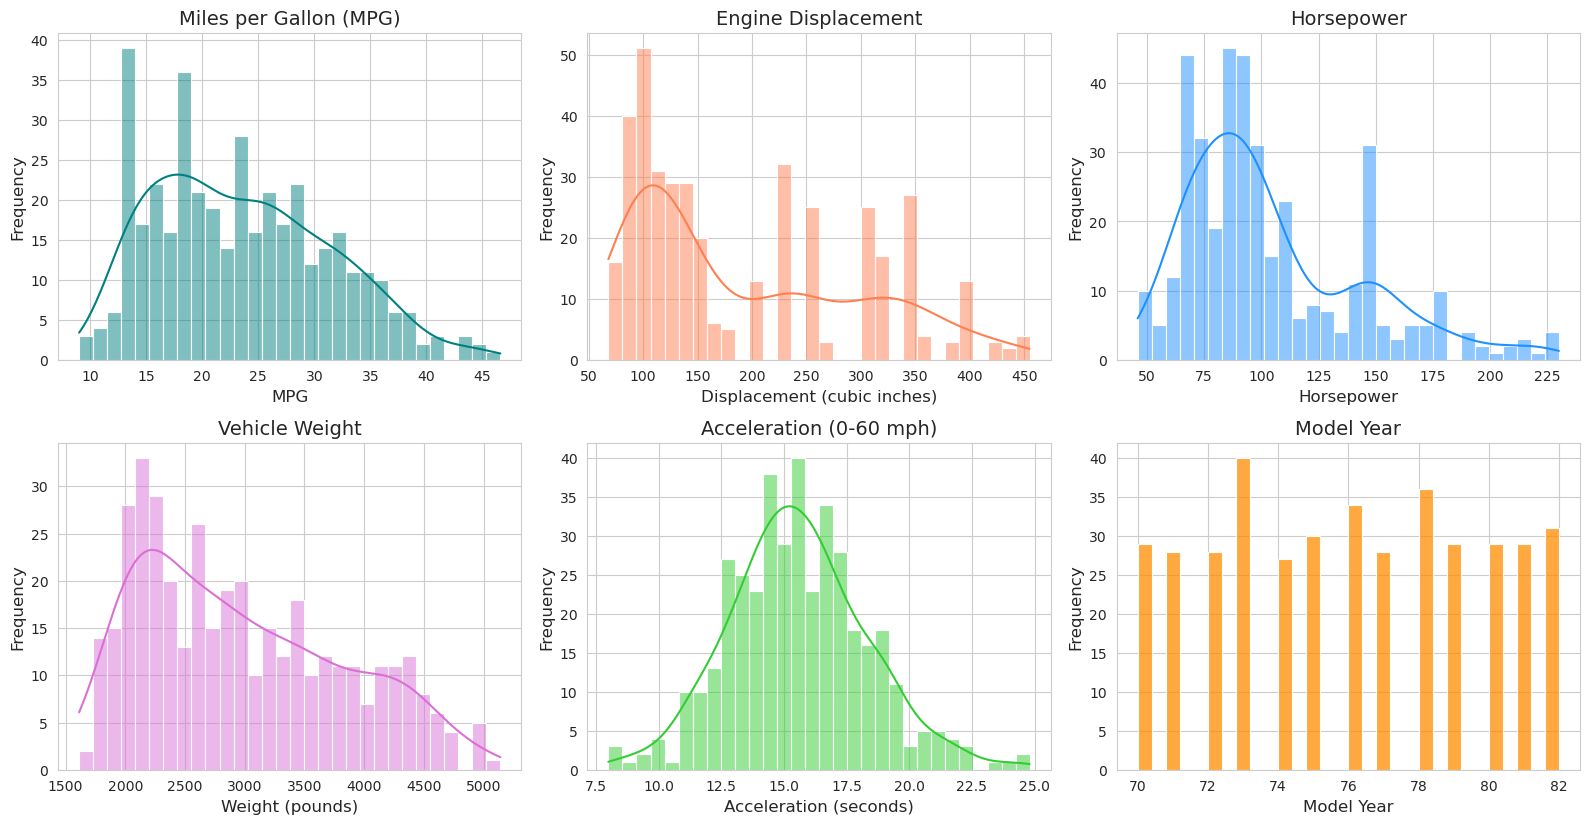

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(16, 12))

# Subplot 1 - MPG (Miles per Gallon)
plt.subplot(3, 3, 1)
sns.histplot(df['mpg'], bins=30, kde=True, color='teal')
plt.title('Miles per Gallon (MPG)', fontsize=14)
plt.xlabel('MPG', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 2 - Displacement
plt.subplot(3, 3, 2)
sns.histplot(df['displacement'], bins=30, kde=True, color='coral')
plt.title('Engine Displacement', fontsize=14)
plt.xlabel('Displacement (cubic inches)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 3 - Horsepower
plt.subplot(3, 3, 3)
sns.histplot(df['horsepower'], bins=30, kde=True, color='dodgerblue')
plt.title('Horsepower', fontsize=14)
plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 4 - Vehicle Weight
plt.subplot(3, 3, 4)
sns.histplot(df['weight'], bins=30, kde=True, color='orchid')
plt.title('Vehicle Weight', fontsize=14)
plt.xlabel('Weight (pounds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 5 - Acceleration
plt.subplot(3, 3, 5)
sns.histplot(df['acceleration'], bins=30, kde=True, color='limegreen')
plt.title('Acceleration (0-60 mph)', fontsize=14)
plt.xlabel('Acceleration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 6 - Model Year
plt.subplot(3, 3, 6)
sns.histplot(df['model year'], bins=30, kde=False, color='darkorange')
plt.title('Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.tight_layout()

plt.show()


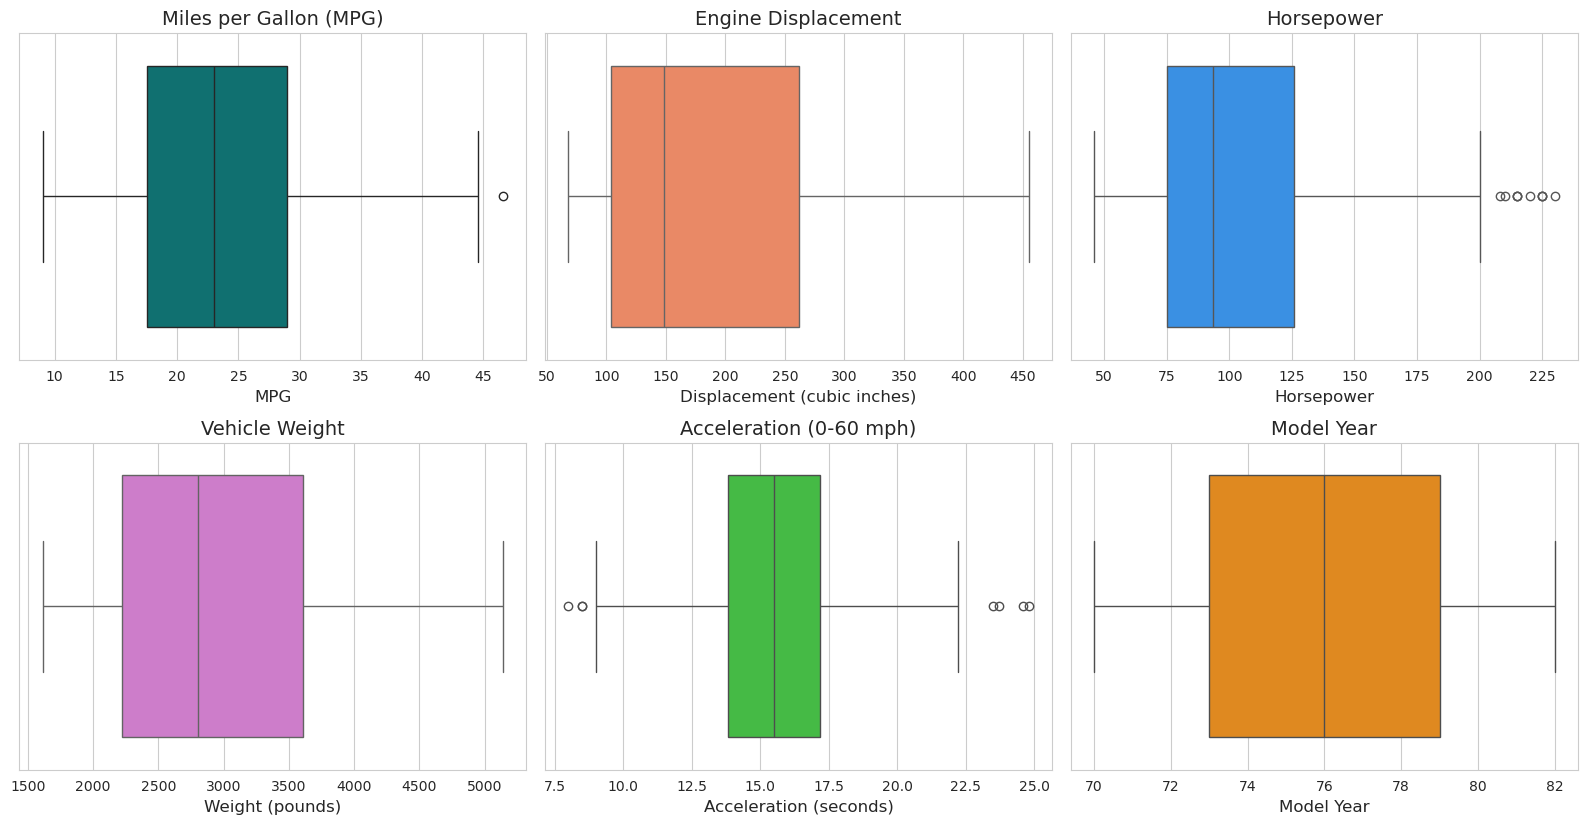

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(16, 12))

# Subplot 1 - Boxplot for MPG (Miles per Gallon)
plt.subplot(3, 3, 1)
sns.boxplot(x=df['mpg'], color='teal')
plt.title('Miles per Gallon (MPG)', fontsize=14)
plt.xlabel('MPG', fontsize=12)

# Subplot 2 - Boxplot for Displacement
plt.subplot(3, 3, 2)
sns.boxplot(x=df['displacement'], color='coral')
plt.title('Engine Displacement', fontsize=14)
plt.xlabel('Displacement (cubic inches)', fontsize=12)

# Subplot 3 - Boxplot for Horsepower
plt.subplot(3, 3, 3)
sns.boxplot(x=df['horsepower'], color='dodgerblue')
plt.title('Horsepower', fontsize=14)
plt.xlabel('Horsepower', fontsize=12)

# Subplot 4 - Boxplot for Vehicle Weight
plt.subplot(3, 3, 4)
sns.boxplot(x=df['weight'], color='orchid')
plt.title('Vehicle Weight', fontsize=14)
plt.xlabel('Weight (pounds)', fontsize=12)

# Subplot 5 - Boxplot for Acceleration
plt.subplot(3, 3, 5)
sns.boxplot(x=df['acceleration'], color='limegreen')
plt.title('Acceleration (0-60 mph)', fontsize=14)
plt.xlabel('Acceleration (seconds)', fontsize=12)

# Subplot 6 - Boxplot for Model Year
plt.subplot(3, 3, 6)
sns.boxplot(x=df['model year'], color='darkorange')
plt.title('Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)


plt.tight_layout()


plt.show()


#### Cleaning

In [32]:

missing_values = df.isnull().sum()
print(missing_values)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [33]:

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df['horsepower'] = imputer.fit_transform(df[['horsepower']])

In [35]:

print(df.shape)

(398, 9)


In [36]:
# IQR: Miles per Gallon (MPG), Engine Displacement, Horsepower , Vehicle Weight.
# Z-Score: Acceleration (0-60 mph)
# Not Applicable: Model Year (categorical).

#first find the no of outliers in each column

from scipy.stats import zscore
from scipy.stats import skew
from scipy import stats
Iqr_columns = ['mpg', 'displacement', 'horsepower', 'weight']
Zscore_columns = ['acceleration']
def calculate_skewness(data):
    return stats.skew(data)

for column in Iqr_columns:
    skewness = calculate_skewness(df[column])
    print(f"Skewness of {column}: {skewness}")


Q1 = df[Iqr_columns].quantile(0.25)
Q3 = df[Iqr_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = {}
upper_bound = {}

multipliers = {'mpg': 1.5, 'displacement': 1, 'horsepower': 0.9, 'weight': 0.5}
for column in Iqr_columns:
    lower_bound[column] = Q1[column] - multipliers[column] * IQR[column]
    upper_bound[column] = Q3[column] + multipliers[column] * IQR[column]
   
    outliers = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])].shape[0]
    print(f"Number of outliers in {column}: {outliers}")
   
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

# Calculate the Z-Score for the 'acceleration' column
df['acceleration_zscore'] = zscore(df['acceleration'])

# Find the number of outliers
outliers = df[(df['acceleration_zscore'] > 3) | (df['acceleration_zscore'] < -3)].shape[0]

print(f"Number of outliers in 'acceleration': {outliers}")

# Remove the outliers
df = df[(df['acceleration_zscore'] <= 3) & (df['acceleration_zscore'] >= -3)]

df = df.drop('acceleration_zscore', axis=1)







Skewness of mpg: 0.45534192556309266
Skewness of displacement: 0.716930089340474
Skewness of horsepower: 1.0914191838332945
Skewness of weight: 0.5290589216608383
Number of outliers in mpg: 1
Number of outliers in displacement: 9
Number of outliers in horsepower: 23
Number of outliers in weight: 14
Number of outliers in 'acceleration': 4


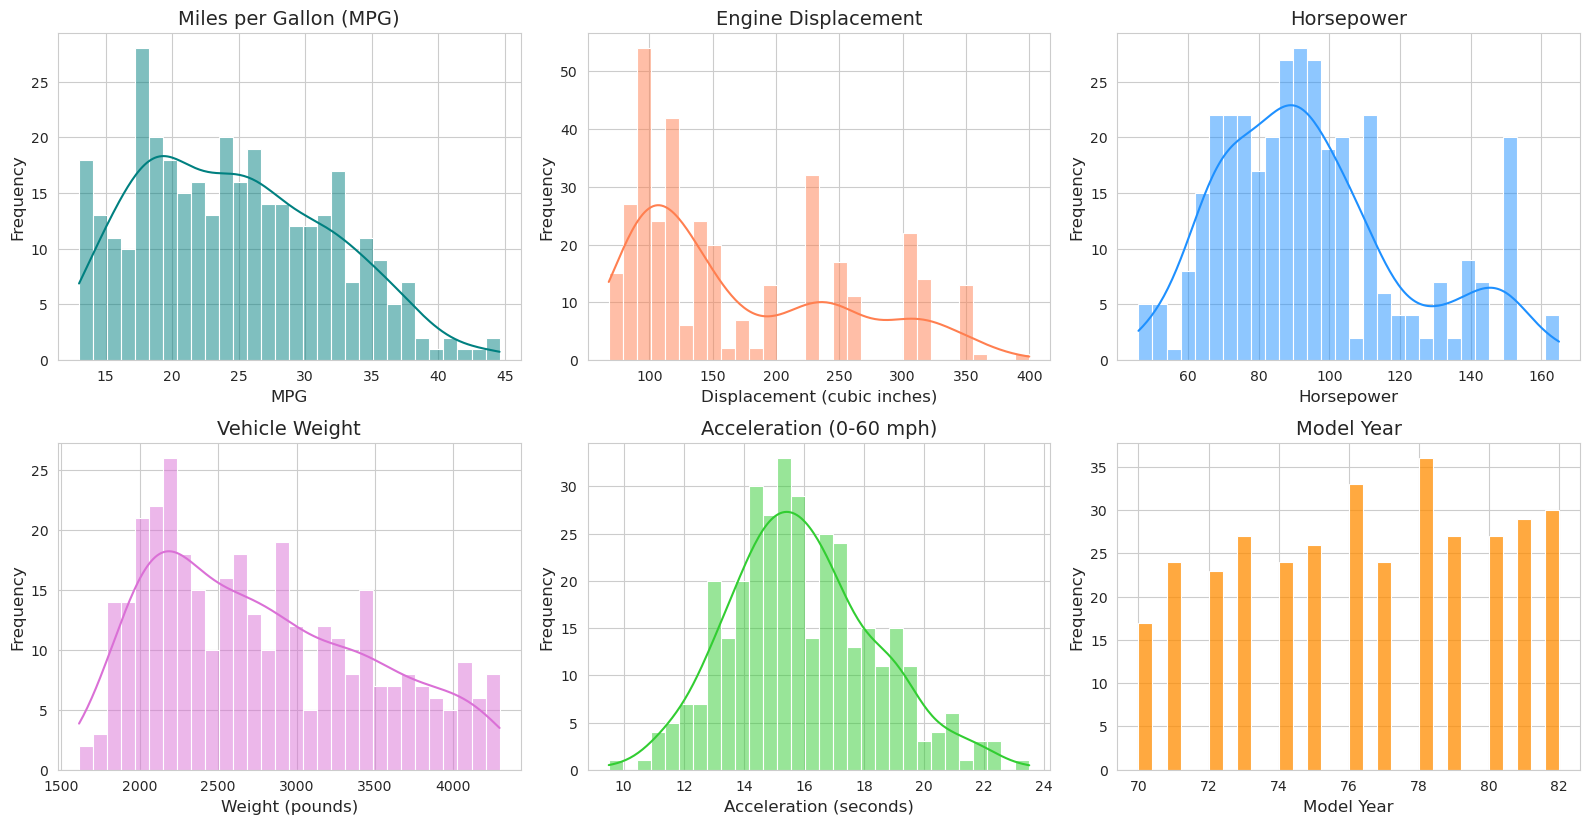

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(16, 12))

# Subplot 1 - MPG (Miles per Gallon)
plt.subplot(3, 3, 1)
sns.histplot(df['mpg'], bins=30, kde=True, color='teal')
plt.title('Miles per Gallon (MPG)', fontsize=14)
plt.xlabel('MPG', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 2 - Displacement
plt.subplot(3, 3, 2)
sns.histplot(df['displacement'], bins=30, kde=True, color='coral')
plt.title('Engine Displacement', fontsize=14)
plt.xlabel('Displacement (cubic inches)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 3 - Horsepower
plt.subplot(3, 3, 3)
sns.histplot(df['horsepower'], bins=30, kde=True, color='dodgerblue')
plt.title('Horsepower', fontsize=14)
plt.xlabel('Horsepower', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 4 - Vehicle Weight
plt.subplot(3, 3, 4)
sns.histplot(df['weight'], bins=30, kde=True, color='orchid')
plt.title('Vehicle Weight', fontsize=14)
plt.xlabel('Weight (pounds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 5 - Acceleration
plt.subplot(3, 3, 5)
sns.histplot(df['acceleration'], bins=30, kde=True, color='limegreen')
plt.title('Acceleration (0-60 mph)', fontsize=14)
plt.xlabel('Acceleration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Subplot 6 - Model Year
plt.subplot(3, 3, 6)
sns.histplot(df['model year'], bins=30, kde=False, color='darkorange')
plt.title('Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.tight_layout()

plt.show()


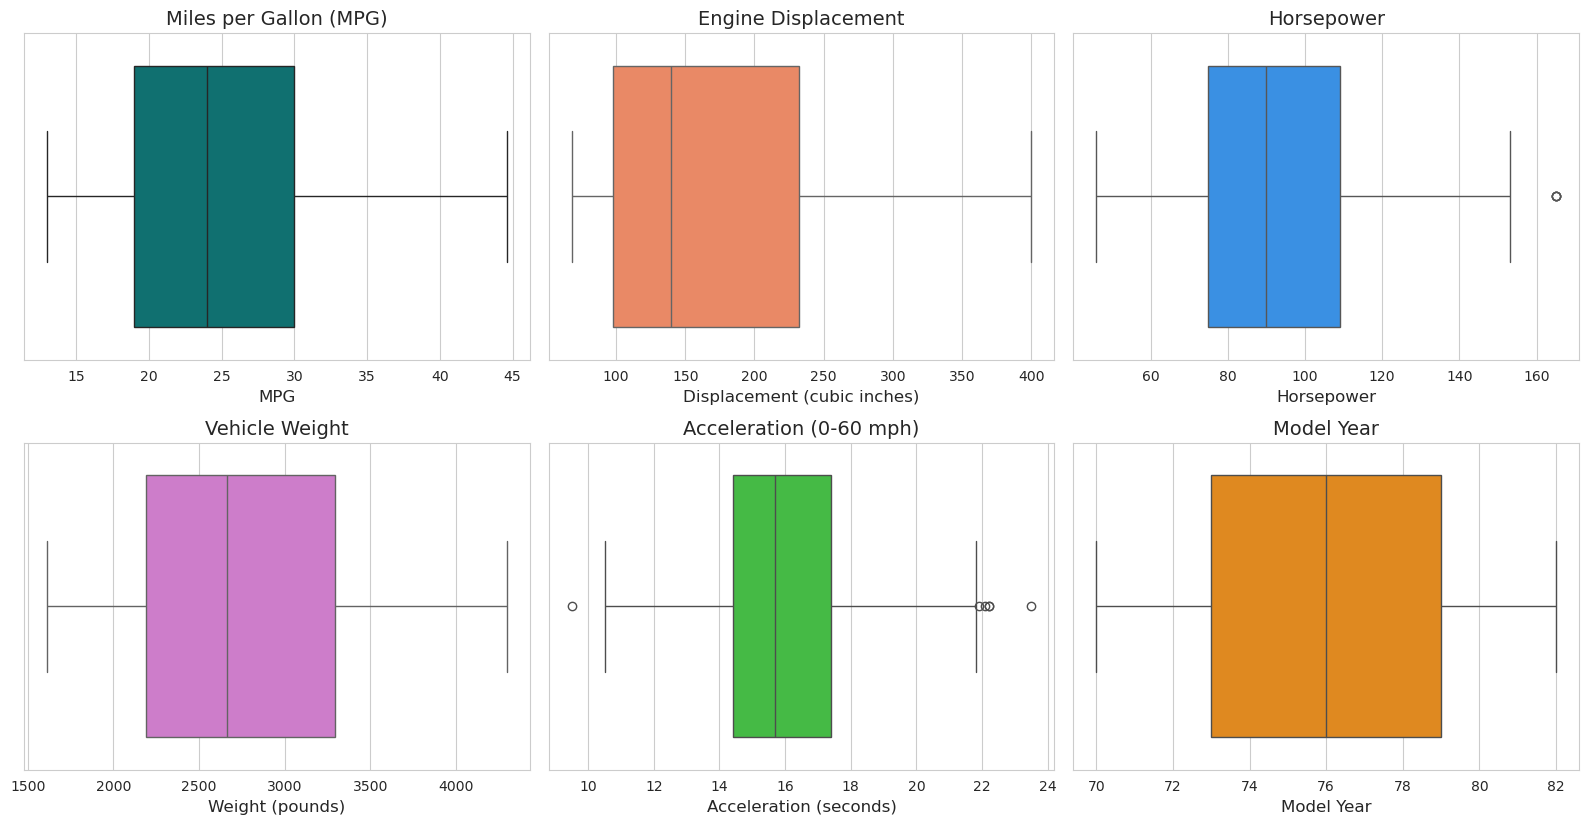

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(16, 12))

# Subplot 1 - Boxplot for MPG (Miles per Gallon)
plt.subplot(3, 3, 1)
sns.boxplot(x=df['mpg'], color='teal')
plt.title('Miles per Gallon (MPG)', fontsize=14)
plt.xlabel('MPG', fontsize=12)

# Subplot 2 - Boxplot for Displacement
plt.subplot(3, 3, 2)
sns.boxplot(x=df['displacement'], color='coral')
plt.title('Engine Displacement', fontsize=14)
plt.xlabel('Displacement (cubic inches)', fontsize=12)

# Subplot 3 - Boxplot for Horsepower
plt.subplot(3, 3, 3)
sns.boxplot(x=df['horsepower'], color='dodgerblue')
plt.title('Horsepower', fontsize=14)
plt.xlabel('Horsepower', fontsize=12)

# Subplot 4 - Boxplot for Vehicle Weight
plt.subplot(3, 3, 4)
sns.boxplot(x=df['weight'], color='orchid')
plt.title('Vehicle Weight', fontsize=14)
plt.xlabel('Weight (pounds)', fontsize=12)

# Subplot 5 - Boxplot for Acceleration
plt.subplot(3, 3, 5)
sns.boxplot(x=df['acceleration'], color='limegreen')
plt.title('Acceleration (0-60 mph)', fontsize=14)
plt.xlabel('Acceleration (seconds)', fontsize=12)

# Subplot 6 - Boxplot for Model Year
plt.subplot(3, 3, 6)
sns.boxplot(x=df['model year'], color='darkorange')
plt.title('Model Year', fontsize=14)
plt.xlabel('Model Year', fontsize=12)


plt.tight_layout()


plt.show()


#### Encoding 

In [39]:
from sklearn.preprocessing import OneHotEncoder

import pandas as pd

encoder = OneHotEncoder(sparse_output=False)

encoded_cols = pd.DataFrame(encoder.fit_transform(df[['car name']]), columns=encoder.get_feature_names_out(['car name']))

df = df.drop('car name', axis=1)

df = pd.concat([df, encoded_cols], axis=1)





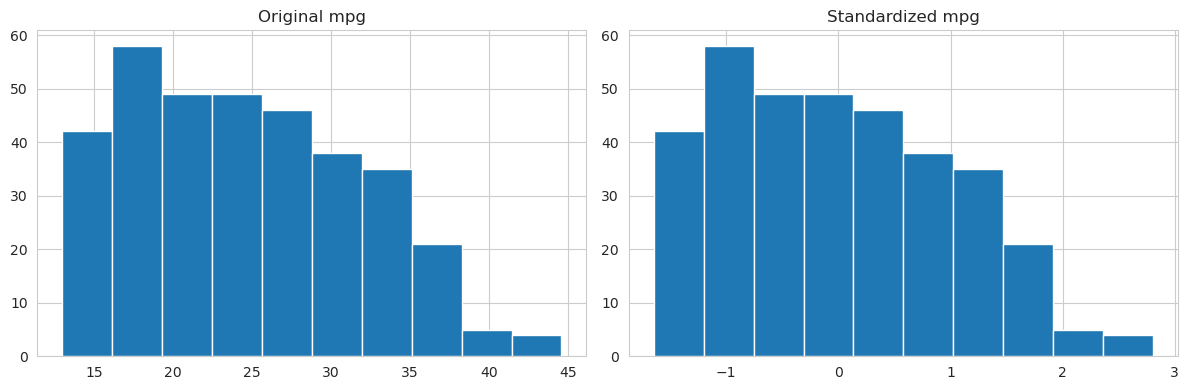

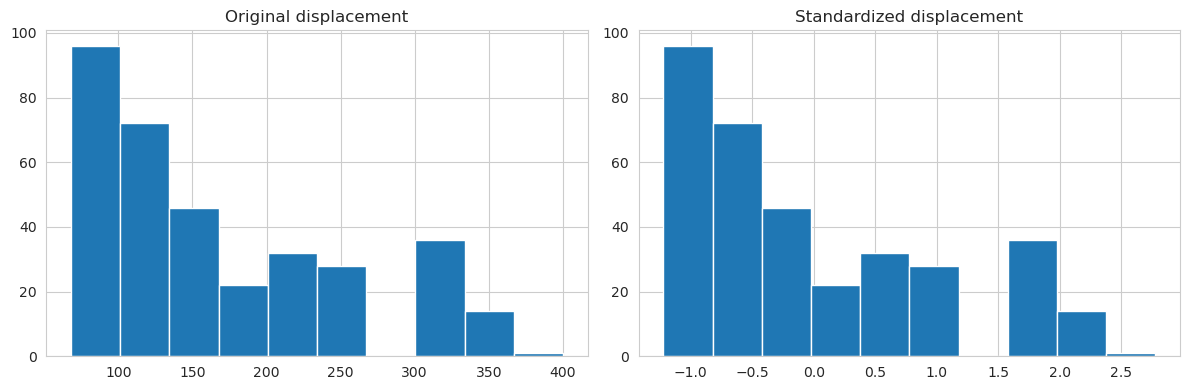

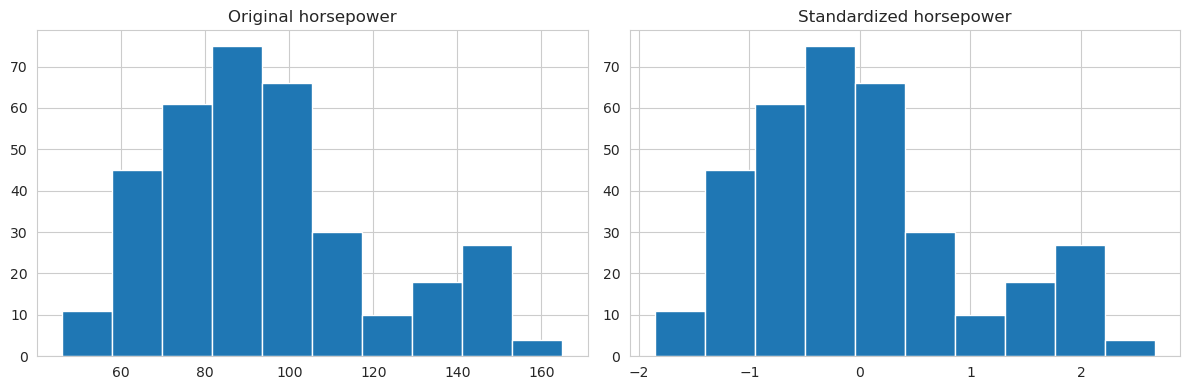

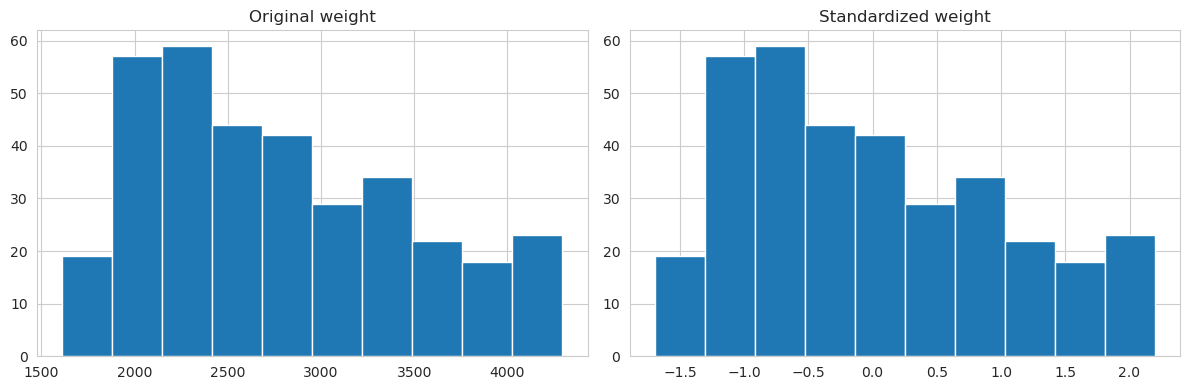

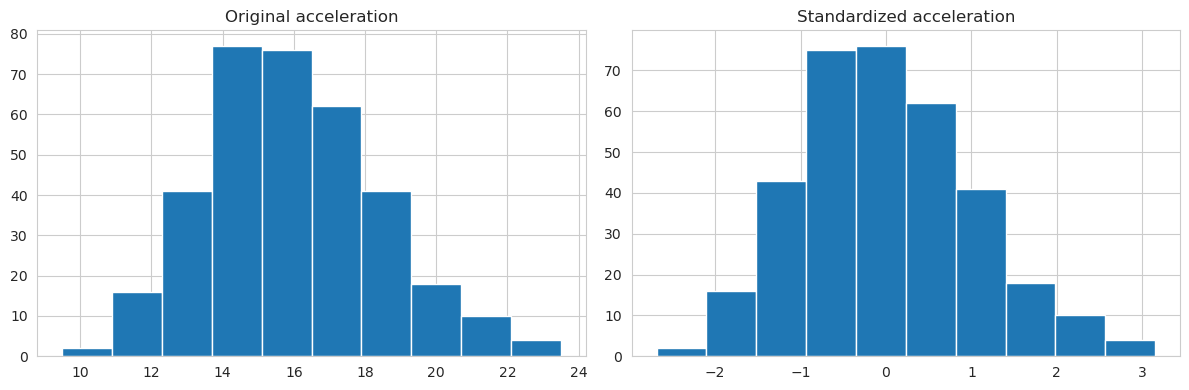

Original data statistics:
              mpg  displacement  horsepower       weight  acceleration
count  347.000000    347.000000  347.000000   347.000000    347.000000
mean    24.683573    169.416427   94.766041  2780.662824     15.942075
std      7.112575     83.116223   26.355453   689.889343      2.403710
min     13.000000     68.000000   46.000000  1613.000000      9.500000
25%     19.000000     98.000000   75.000000  2189.500000     14.400000
50%     24.000000    140.000000   90.000000  2665.000000     15.700000
75%     30.000000    232.000000  109.000000  3295.000000     17.400000
max     44.600000    400.000000  165.000000  4295.000000     23.500000

Standardized data statistics:
                mpg  displacement    horsepower        weight  acceleration
count  3.470000e+02  3.470000e+02  3.470000e+02  3.470000e+02  3.470000e+02
mean  -1.228604e-16  1.638139e-16  5.221568e-16  3.276278e-16  3.634621e-16
std    1.001444e+00  1.001444e+00  1.001444e+00  1.001444e+00  1.001444e+00


In [43]:
from sklearn.preprocessing import StandardScaler
features_to_scale = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Compare original and scaled data
for feature in features_to_scale:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Original data
    df[feature].hist(ax=ax1)
    ax1.set_title(f'Original {feature}')
   
   
    # Scaled data
    df_scaled[feature].hist(ax=ax2)
    ax2.set_title(f'Standardized {feature}')
  
  
    plt.tight_layout()
    plt.show()

print("Original data statistics:")
print(df[features_to_scale].describe())
print("\nStandardized data statistics:")
print(df_scaled[features_to_scale].describe())

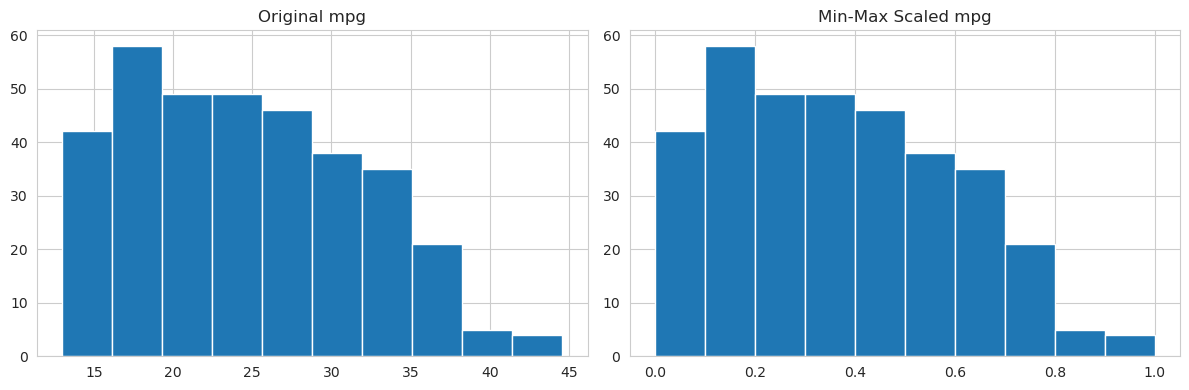

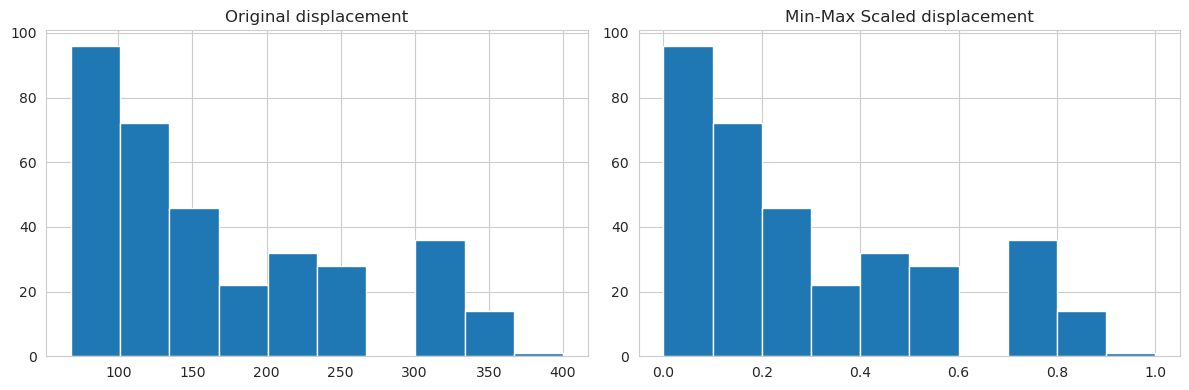

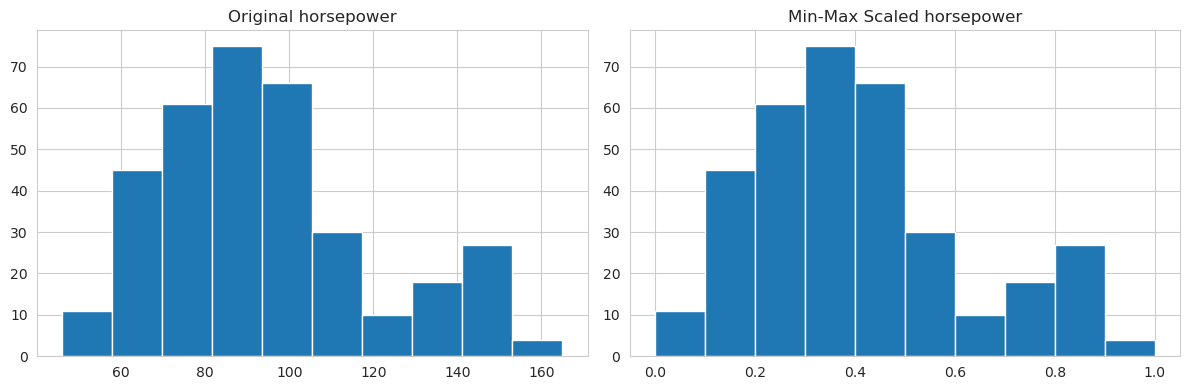

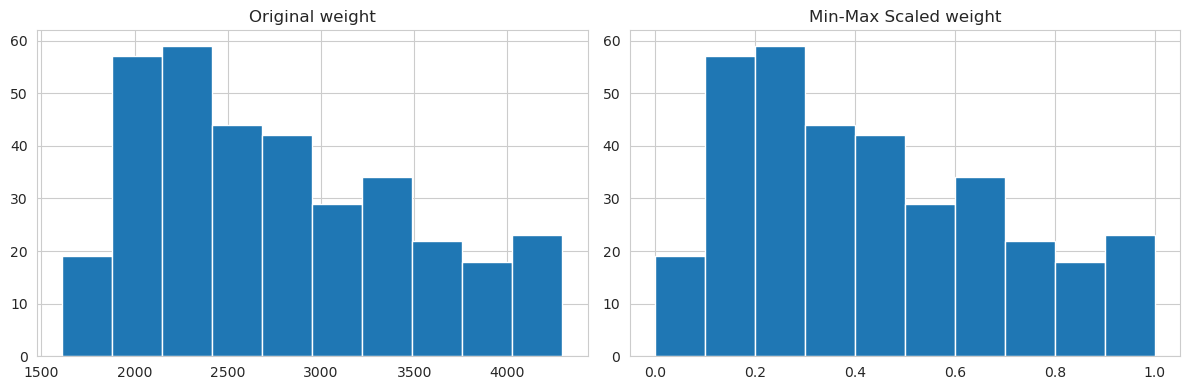

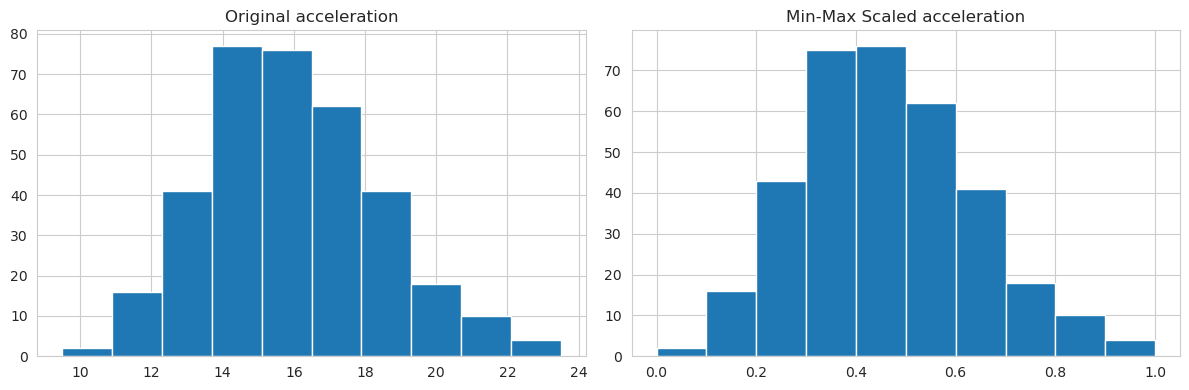

Original data statistics:
              mpg  displacement  horsepower       weight  acceleration
count  347.000000    347.000000  347.000000   347.000000    347.000000
mean    24.683573    169.416427   94.766041  2780.662824     15.942075
std      7.112575     83.116223   26.355453   689.889343      2.403710
min     13.000000     68.000000   46.000000  1613.000000      9.500000
25%     19.000000     98.000000   75.000000  2189.500000     14.400000
50%     24.000000    140.000000   90.000000  2665.000000     15.700000
75%     30.000000    232.000000  109.000000  3295.000000     17.400000
max     44.600000    400.000000  165.000000  4295.000000     23.500000

Min-Max scaled data statistics:
              mpg  displacement  horsepower      weight  acceleration
count  347.000000    347.000000  347.000000  347.000000    347.000000
mean     0.369733      0.305471    0.409799    0.435370      0.460148
std      0.225081      0.250350    0.221474    0.257229      0.171694
min      0.000000     

In [44]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])

# Compare original and min-max scaled data
for feature in features_to_scale:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Original data
    df[feature].hist(ax=ax1)
    ax1.set_title(f'Original {feature}')
 
    
    # Min-Max scaled data
    df_minmax[feature].hist(ax=ax2)
    ax2.set_title(f'Min-Max Scaled {feature}')
   
    
    plt.tight_layout()
    plt.show()

print("Original data statistics:")
print(df[features_to_scale].describe())
print("\nMin-Max scaled data statistics:")
print(df_minmax[features_to_scale].describe())